<a href="https://colab.research.google.com/github/NethmiJayasinghe/FYP-Image-Classification/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import sequential
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [2]:
#Loading the data
from keras.datasets import cifar10
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
#look at the data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
#checking the shape
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


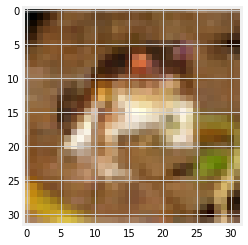

In [9]:
#take a look at the images
index = 0
img= plt.imshow(x_train[index])

In [10]:
#Get the image lable
print('The image lable is: ', y_train[index])

The image lable is:  [6]


In [11]:
#get the image classification
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
#print the image class
print('The image class is: ',classification[y_train[index][0]])

The image class is:  frog


In [12]:
#convert the labels into a set of 10 numbers to input into the neural network
y_train_one = to_categorical(y_train)
y_test_one = to_categorical(y_test)
#print the new labels
print(y_train_one)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [13]:
#print the new labels into image above
print('The one lable is: ',y_train_one[index])

The one lable is:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [14]:
#Normalize the pixels to be values betwen 0 and 1
x_train = x_train/255
x_test = x_test/255
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [24]:
#create the model architecture
model = tf.keras.Sequential()
#Add first layer
model.add(Conv2D(32,(5,5), activation = 'relu', input_shape=(32,32,3)))
#Add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Add another convolutional layer
model.add(Conv2D(32,(5,5), activation = 'relu'))
#Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation = 'relu'))
#Add a dropout layer
model.add(Dropout(0.5))
#Add a layer with 500 neurons
model.add(Dense(500, activation = 'relu'))
#Add a dropout layer
model.add(Dropout(0.5))
#Add a layer with 250 neurons
model.add(Dense(250, activation = 'relu'))
#Add a layer with 10 neurons
model.add(Dense(10, activation = 'softmax'))

In [25]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
#Train the model
hist = model.fit(x_train, y_train_one, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 64s 403ms/step - loss: 1.8088 - accuracy: 0.3172 - val_loss: 1.5086 - val_accuracy: 0.4436
Epoch 2/10
157/157 [==============================] - 62s 395ms/step - loss: 1.4327 - accuracy: 0.4732 - val_loss: 1.3610 - val_accuracy: 0.4979
Epoch 3/10
157/157 [==============================] - 62s 397ms/step - loss: 1.2957 - accuracy: 0.5311 - val_loss: 1.2285 - val_accuracy: 0.5596
Epoch 4/10
157/157 [==============================] - 62s 394ms/step - loss: 1.1831 - accuracy: 0.5773 - val_loss: 1.1437 - val_accuracy: 0.5972
Epoch 5/10
157/157 [==============================] - 62s 397ms/step - loss: 1.1055 - accuracy: 0.6055 - val_loss: 1.0982 - val_accuracy: 0.6158
Epoch 6/10
157/157 [==============================] - 63s 398ms/step - loss: 1.0307 - accuracy: 0.6322 - val_loss: 1.0269 - val_accuracy: 0.6372
Epoch 7/10
157/157 [==============================] - 63s 400ms/step - loss: 0.9629 - accuracy: 0.6567 - val_loss: 0.9992 - val_ac

In [27]:
#Evaluate the model using test data set
model.evaluate(x_test, y_test_one)[1]

313/313 [==============================] - 6s 19ms/step - loss: 0.9444 - accuracy: 0.6690


0.6690000295639038

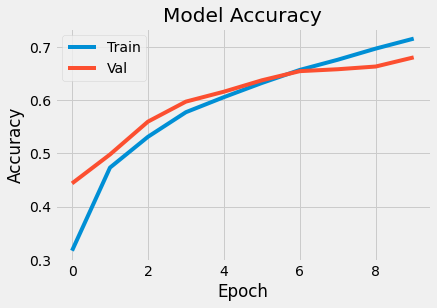

In [28]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

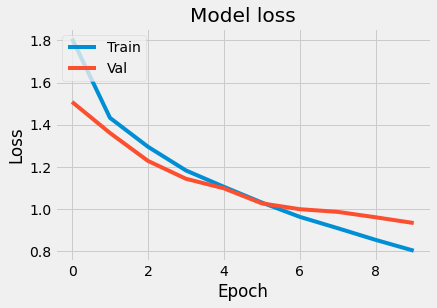

In [29]:
#Visualizing the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [50]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving catt.jpg to catt.jpg


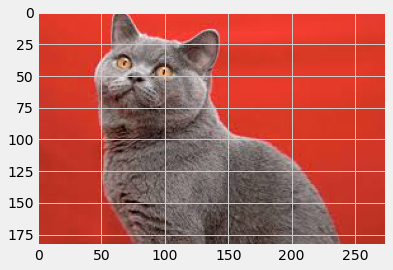

In [51]:
#Show the image
new_image = plt.imread('catt.jpg')
img=plt.imshow(new_image)

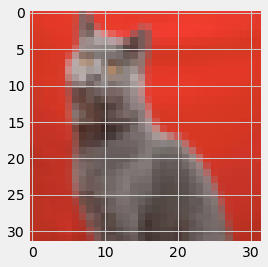

In [52]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image,(32,32,3))
img = plt.imshow(resized_image)

In [53]:
#Get the models predictions
predictions = model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[5.2318063e-02, 4.5586712e-04, 4.8609227e-02, 5.2137905e-01,
        2.2531098e-02, 3.2189369e-01, 1.8660984e-03, 2.7946102e-02,
        2.1610858e-03, 8.3975791e-04]], dtype=float32)

In [54]:
#Sort the predictions
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]]> x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#Show the sorted  labels in order
print(list_index)

[3, 5, 0, 2, 7, 4, 8, 6, 9, 1]


In [55]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]],':', round(predictions[0][list_index[i]]*100,2), '%')

cat : 52.14 %
dog : 32.19 %
airplane : 5.23 %
bird : 4.86 %
horse : 2.79 %
